In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/crowd_count_dataset/yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

INFO:yolov5:YOLOv5 🚀 v6.2-14-gd40cd0d4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv5 🚀 v6.2-14-gd40cd0d4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 25 --data data.yaml --weights yolov5s.pt --name exp  --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v6.2-14-gd40cd0d4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

In [ ]:
!python detect.py --weights runs/train/exp30/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/crowd_count_dataset/train_skin/images/ --save-txt 

detect: weights=['runs/train/exp30/weights/best.pt'], source=/content/drive/MyDrive/crowd_count_dataset/train_skin/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-14-gd40cd0d4 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1227 /content/drive/MyDrive/crowd_count_dataset/train_skin/images/img0.jpg: 320x640 (no detections), 16.6ms
image 2/1227 /content/drive/MyDrive/crowd_count_dataset/train_skin/images/img1.jpg: 416x640 1 second_degree, 12.2ms
image 3/1227 /content/drive/MyDrive/crowd_count_dataset/train_skin/images/img10.jpg: 

In [ ]:
import os
result_dir = "runs/detect/exp20/labels/"
result_label = os.listdir(result_dir)
result_label

['img1002.txt',
 'img1004.txt',
 'img1005.txt',
 'img101.txt',
 'img1011.txt',
 'img102.txt',
 'img1021.txt',
 'img1025.txt',
 'img1026.txt',
 'img1027.txt',
 'img1028.txt',
 'img1029.txt',
 'img1031.txt',
 'img1032.txt',
 'img1033.txt',
 'img1040.txt',
 'img1042.txt',
 'img1058.txt',
 'img1060.txt',
 'img1063.txt',
 'img1065.txt',
 'img1067.txt',
 'img1069.txt',
 'img1072.txt',
 'img1078.txt',
 'img1081.txt',
 'img1085.txt',
 'img1090.txt',
 'img1092.txt',
 'img1093.txt',
 'img1097.txt',
 'img1099.txt',
 'img11.txt',
 'img110.txt',
 'img1103.txt',
 'img1104.txt',
 'img1106.txt',
 'img111.txt',
 'img1110.txt',
 'img1114.txt',
 'img1115.txt',
 'img1118.txt',
 'img1119.txt',
 'img112.txt',
 'img1123.txt',
 'img1131.txt',
 'img1132.txt',
 'img1137.txt',
 'img1140.txt',
 'img1141.txt',
 'img1143.txt',
 'img1147.txt',
 'img1151.txt',
 'img1154.txt',
 'img1163.txt',
 'img1165.txt',
 'img1167.txt',
 'img1171.txt',
 'img1172.txt',
 'img1174.txt',
 'img1178.txt',
 'img1181.txt',
 'img1198.txt',

In [ ]:
predicted_lines = {}
for i in result_label:
  with open(result_dir+i, 'r') as fp:
    lines = len(fp.readlines())
    predicted_lines[i] = lines

In [ ]:
predicted_lines

{'img1002.txt': 1,
 'img1004.txt': 1,
 'img1005.txt': 2,
 'img101.txt': 1,
 'img1011.txt': 1,
 'img102.txt': 1,
 'img1021.txt': 1,
 'img1025.txt': 1,
 'img1026.txt': 1,
 'img1027.txt': 1,
 'img1028.txt': 1,
 'img1029.txt': 1,
 'img1031.txt': 1,
 'img1032.txt': 2,
 'img1033.txt': 1,
 'img1040.txt': 2,
 'img1042.txt': 1,
 'img1058.txt': 1,
 'img1060.txt': 3,
 'img1063.txt': 1,
 'img1065.txt': 1,
 'img1067.txt': 1,
 'img1069.txt': 2,
 'img1072.txt': 2,
 'img1078.txt': 1,
 'img1081.txt': 1,
 'img1085.txt': 1,
 'img1090.txt': 1,
 'img1092.txt': 1,
 'img1093.txt': 1,
 'img1097.txt': 1,
 'img1099.txt': 1,
 'img11.txt': 1,
 'img110.txt': 1,
 'img1103.txt': 1,
 'img1104.txt': 2,
 'img1106.txt': 3,
 'img111.txt': 1,
 'img1110.txt': 1,
 'img1114.txt': 1,
 'img1115.txt': 1,
 'img1118.txt': 1,
 'img1119.txt': 2,
 'img112.txt': 1,
 'img1123.txt': 2,
 'img1131.txt': 2,
 'img1132.txt': 3,
 'img1137.txt': 1,
 'img1140.txt': 1,
 'img1141.txt': 1,
 'img1143.txt': 1,
 'img1147.txt': 1,
 'img1151.txt': 1,


Text(0.5, 1.0, 'Number of skin detected by yolo=>1')

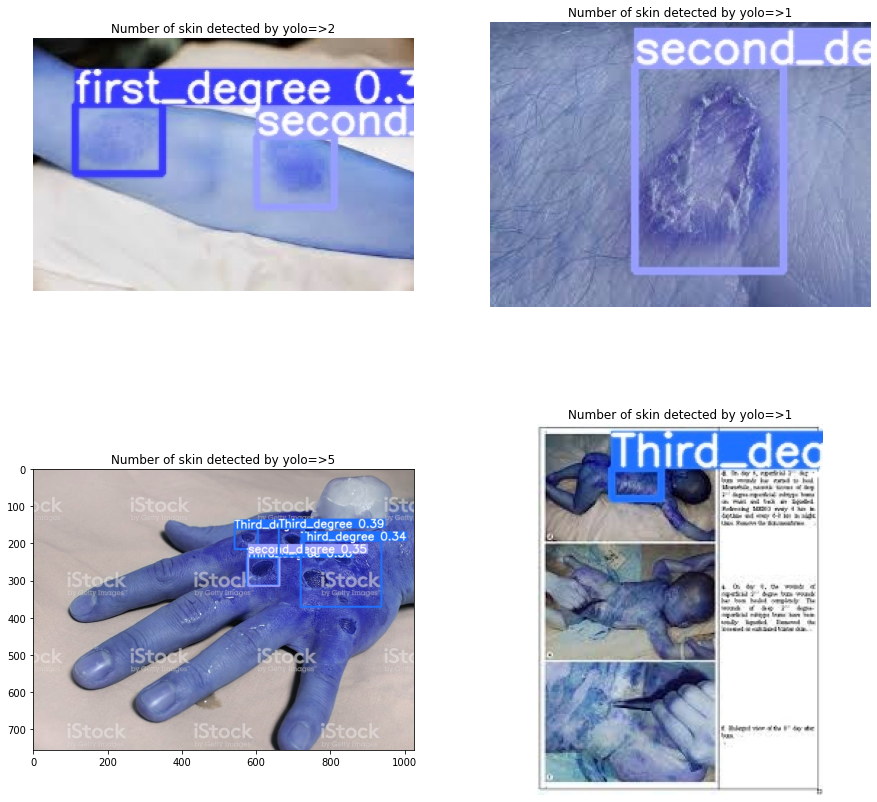

In [ ]:
# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(15, 15))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = cv2.imread('/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/detect/exp20/img25.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/detect/exp20/img26.jpg')
Image3 = cv2.imread('/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/detect/exp20/img798.jpg')
Image4 = cv2.imread('/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/detect/exp20/img101.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title('Number of skin detected by yolo=>' + str(predicted_lines["img25.txt"]))

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title('Number of skin detected by yolo=>' + str(predicted_lines["img26.txt"]))


# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
#plt.axis('off')
plt.title('Number of skin detected by yolo=>' + str(predicted_lines["img798.txt"]))


# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title('Number of skin detected by yolo=>' + str(predicted_lines["img101.txt"]))


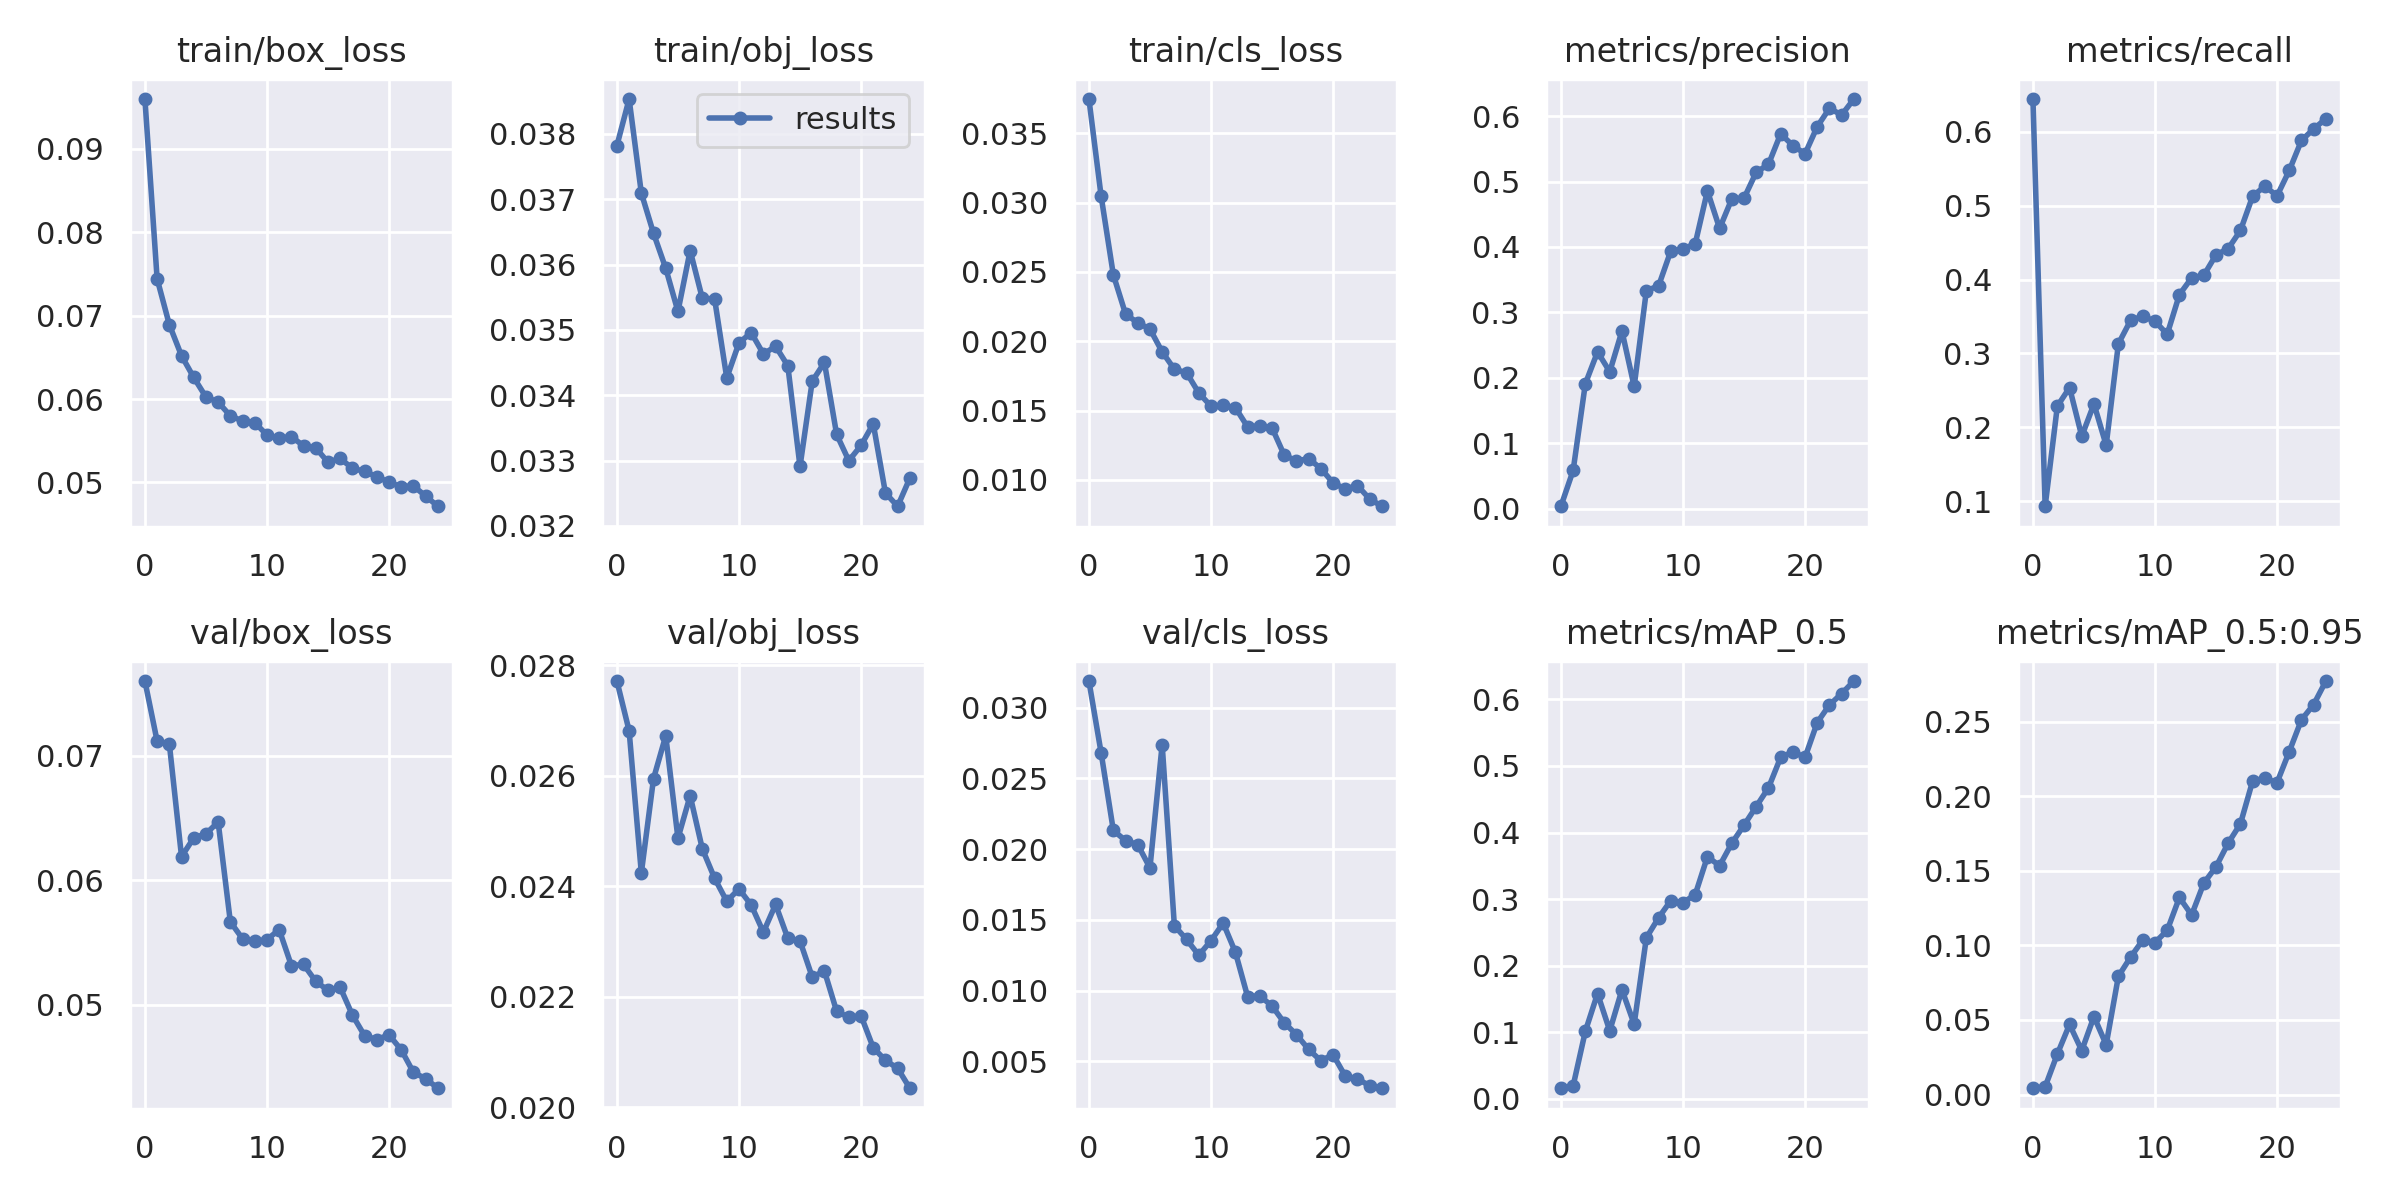

In [ ]:
from utils.plots import plot_results # plot results.txt as results.png
import PIL
from PIL import Image

Image.open("/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/train/exp31/results.png") # view results.png

GROUND TRUTH TRAINING DATA:


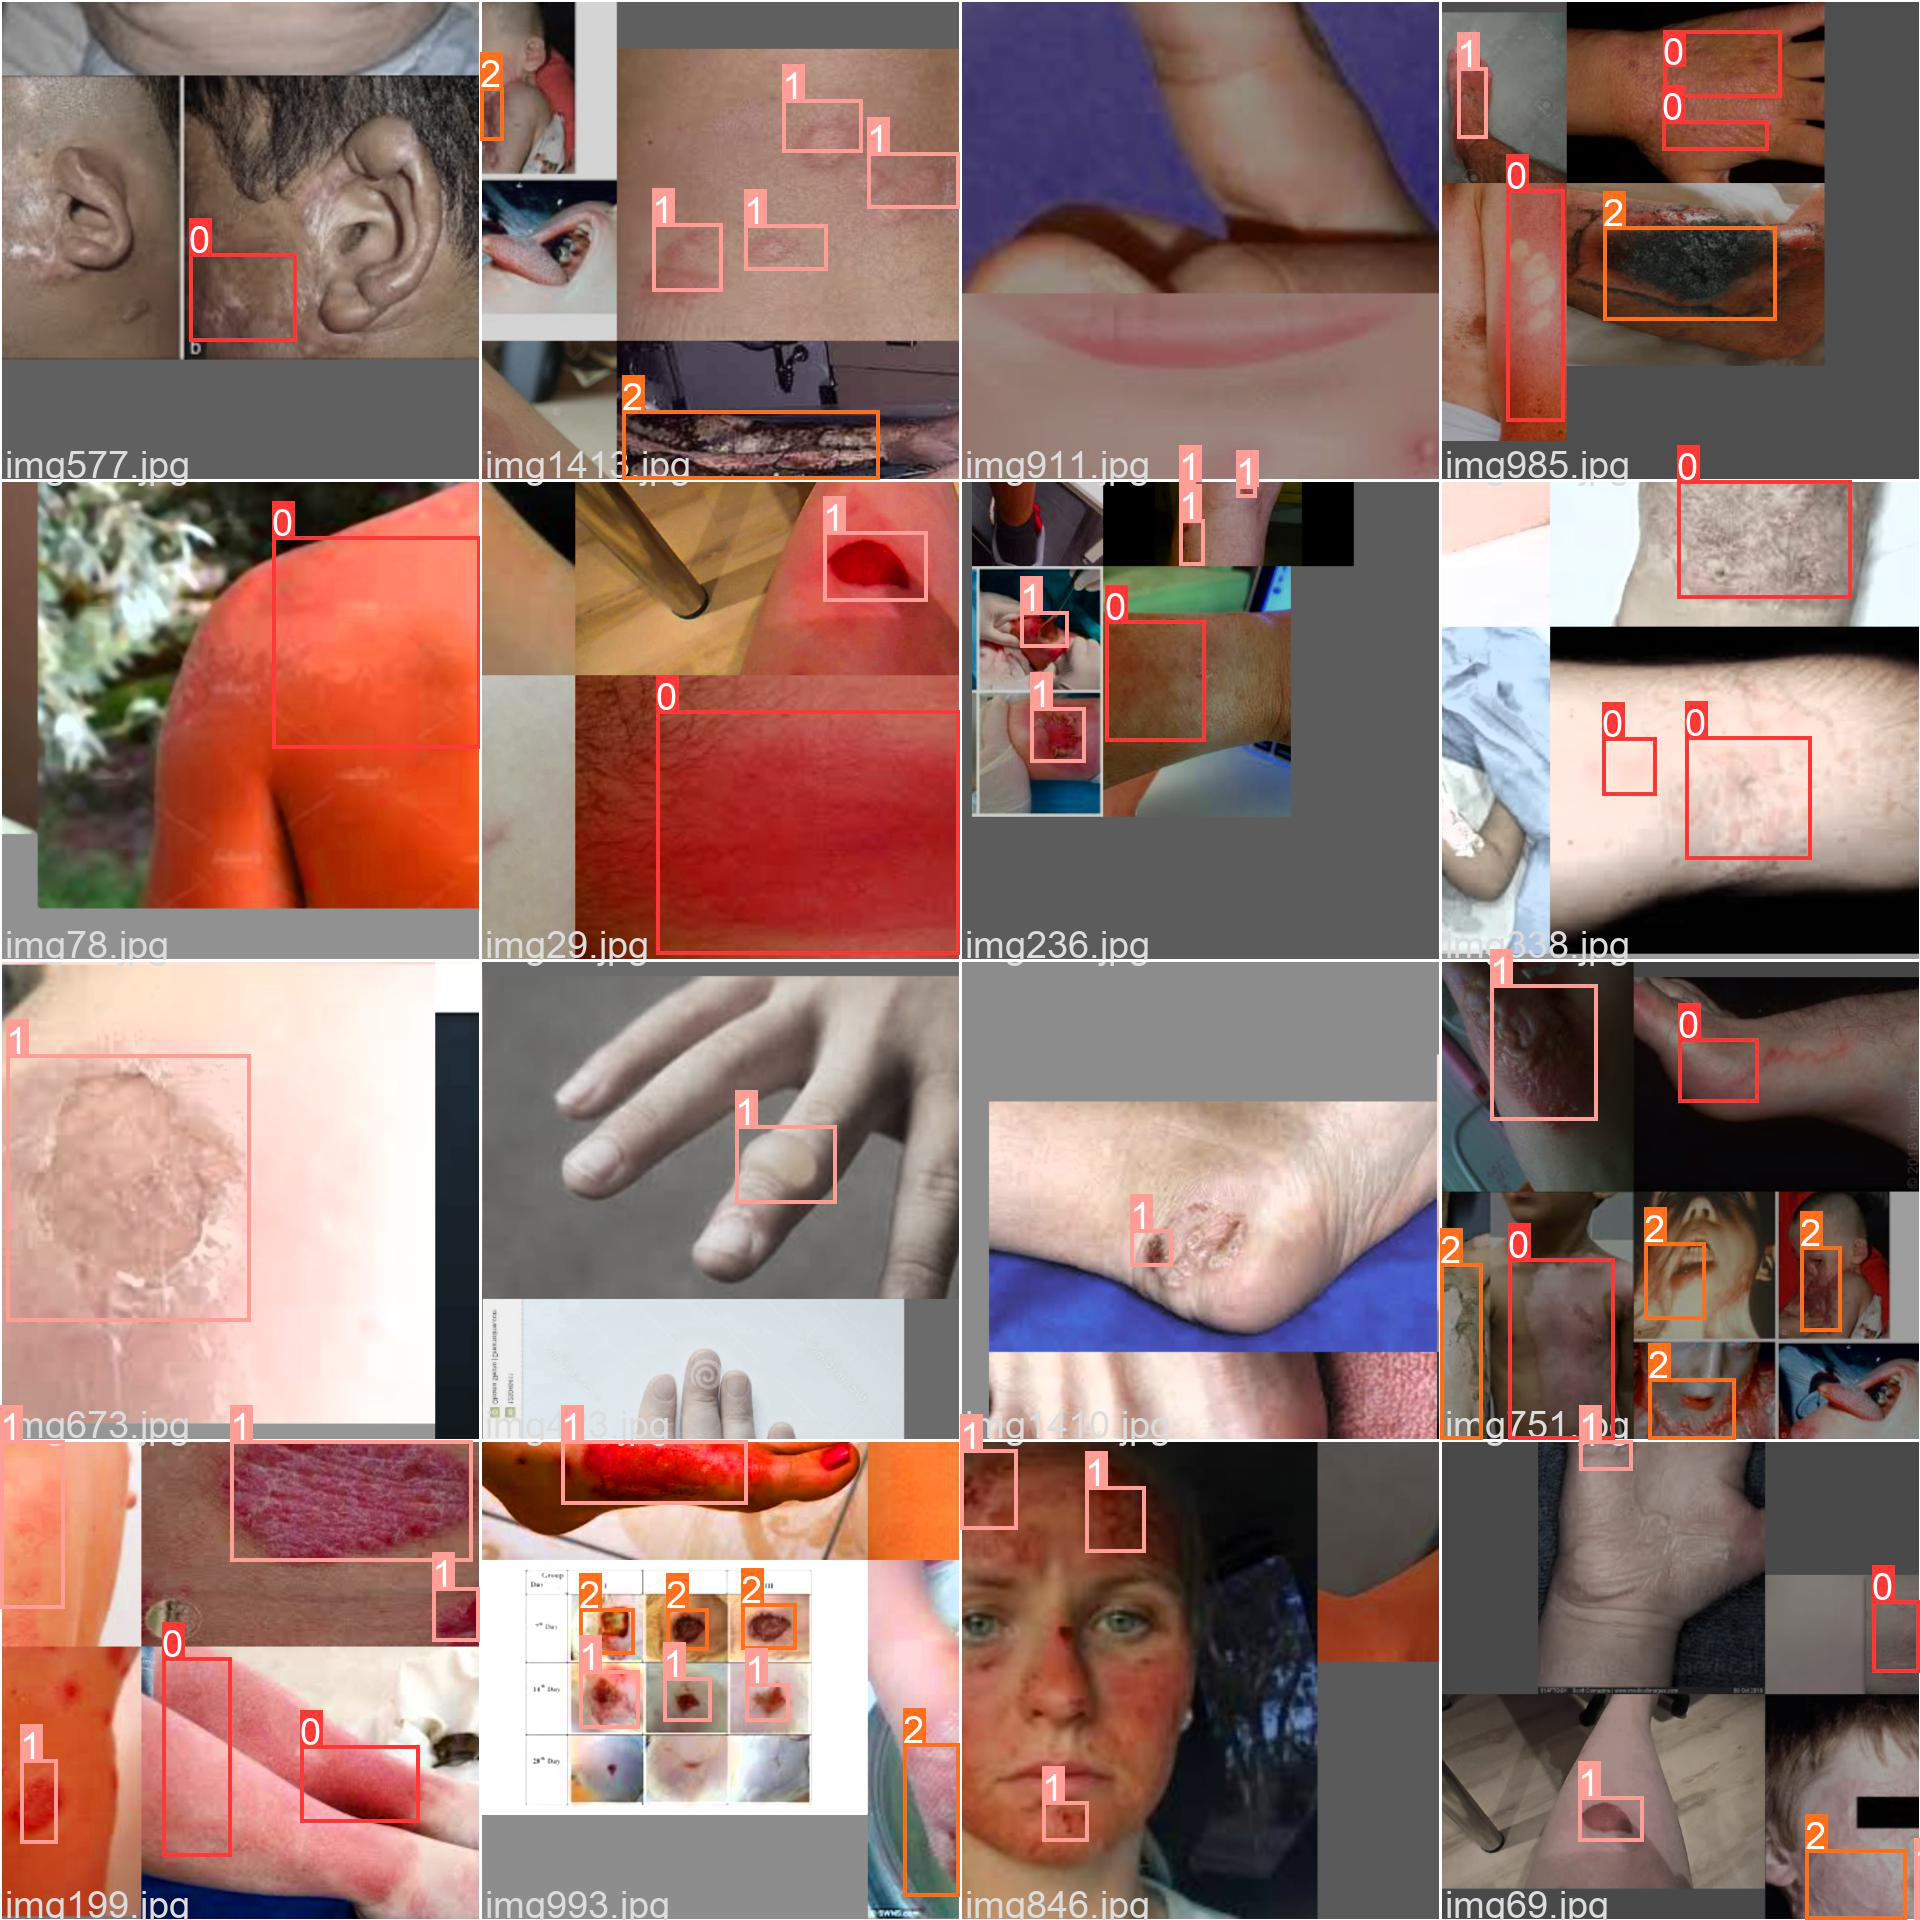

In [ ]:
print("GROUND TRUTH TRAINING DATA:")
Image.open("/content/drive/MyDrive/crowd_count_dataset/yolov5/runs/train/exp31/train_batch1.jpg")

# New section